In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras.models import Sequential
max_features=10000
lenmax=700
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
x_train=sequence.pad_sequences(x_train,maxlen=lenmax)
x_test=sequence.pad_sequences(x_test,maxlen=lenmax)
m_tb=Sequential()
m_tb.add(Embedding(max_features,128,input_length=lenmax))
m_tb.add(Conv1D(32,7,activation='relu'))
m_tb.add(MaxPooling1D(5))
m_tb.add(Conv1D(32,7,activation='relu'))
m_tb.add(GlobalMaxPooling1D())
m_tb.add(Dense(1, activation='sigmoid'))
m_tb.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 700, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 694, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 138, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 132, 32)           7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [2]:
cd C:\\Users\ysp\Desktop\Deep Learning

C:\Users\ysp\Desktop\Deep Learning


In [3]:
from keras.callbacks import TensorBoard
from time import time
import os

In [4]:
tensorboard = TensorBoard(log_dir = 'tb_1\{}'.format(time()), histogram_freq=1)

m_tb.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
m_tb.fit(x_train,y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[tensorboard])

C:\Users\ysp\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4559 - acc: 0.7711 - val_loss: 0.3100 - val_acc: 0.8716
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2478 - acc: 0.9020 - val_loss: 0.3717 - val_acc: 0.8470
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1826 - acc: 0.9305 - val_loss: 0.2889 - val_acc: 0.8874
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1309 - acc: 0.9533 - val_loss: 0.3150 - val_acc: 0.8818
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0865 - acc: 0.9713 - val_loss: 0.3546 - val_acc: 0.8758
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0497 - acc: 0.9854 - val_loss: 0.3981 - val_acc: 0.8736
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.0232 - acc: 0.9939 - val_loss: 0.4485 - val_acc:

In [6]:
!pip install pydot

In [7]:
!pip install pydot-ng

In [8]:
!pip install graphviz

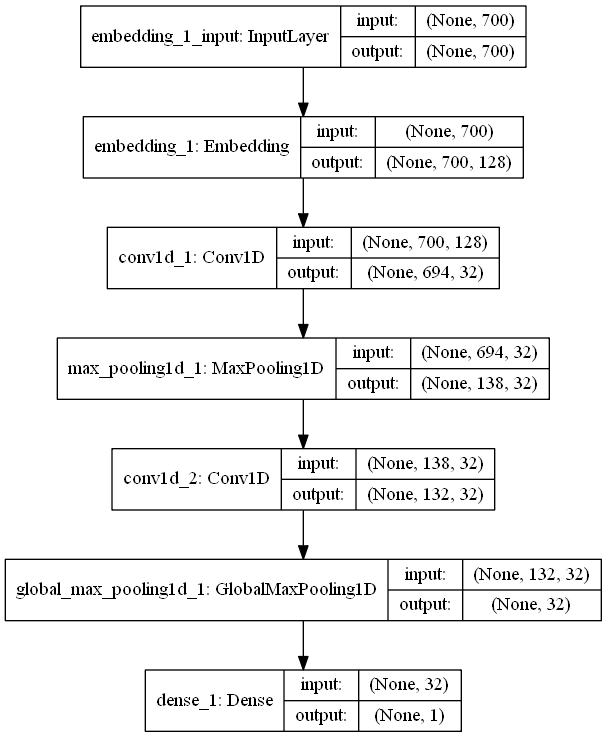

In [9]:
from keras.utils import plot_model
plot_model(m_tb, show_shapes=True, to_file='m_tb.png')

In [10]:
m_tb.save('m_tb.h5')

In [12]:
from keras.models import load_model
model=load_model('m_tb.h5')
yhat=model.predict(x_test)
yhat=model.predict_classes(x_test)
print(yhat[2])

C:\Users\ysp\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


[1]
